# HOMEWORK 2

## Risk Management of Bonds

-- Canel Biryol and Shashank Gupta

## Question 1 

For each tenor bucket, a 'haircut' $h_i$ is given.
Let us assume this 'haircut' is proportional to the 99% VaR of bond returns

\begin{align}
h_i \propto \sigma_i
\newline
\implies h_i = k\sigma_i
\newline
\implies \sigma_i = \frac{h_i}{k}
\end{align}
where $k$ is a constant

Let $N_i$ be the net value held in bucket $i$. Then, the net value $N$ is given as:
\begin{align}
N = \sum_{i=1}^{10} N_i
\end{align}

This gives us the weight of each bucket as following:
\begin{align}
w_i = \frac{N_i}{N}
\end{align}

Now, assuming bond returns follow normal distribution, let $\sigma$ be the standard deviation of the portfolio. Then:
\begin{align}
\sigma = \sqrt{\textbf{$w^\intercal$ $\Sigma$ $w$}}
\end{align}
where $\textbf{$w$}$ $\Rightarrow$ weights vector and $\Sigma$ $\Rightarrow$ Covariance Matrix


\begin{align}
\implies \sigma= \sqrt{\begin{bmatrix}w_1 & w_2 & \ldots & w_{10} \end{bmatrix}
                        \begin{bmatrix} 
                            \sigma_{1}^{2} & \sigma_{1}\sigma_{2}\rho_{12} & \dots & \sigma_{1}\sigma_{10}\rho_{110}\\
                            \sigma_{1}\sigma_{2}\rho_{12} & \sigma_{2}^2 & \dots \\
                            \vdots  &  & \ddots & \vdots \\
                            \sigma_{1}\sigma_{10}\rho_{110} &     &   & \sigma_{10}^{2} 
                            \end{bmatrix}
                        \begin{bmatrix}w_1 \\ w_2 \\ \ldots \\ w_{10} \end{bmatrix}}
\end{align}

\begin{align}
= \sqrt{\sum_{i=1}^{10} \sum_{j=1}^{10} \sigma_i \sigma_j \rho_{ij} w_i w_j} \\
= \sqrt{\sum_{i=1}^{10} \sum_{j=1}^{10} \frac{h_i}{k}\frac{h_j}{k}\rho_{ij}\frac{N_i}{N}\frac{N_j}{N}} \\
\implies \sigma = \frac{1}{kN} \sqrt{\sum_{i=1}^{10}\sum_{j=1}^{10}\rho_{ij}h_i h_j N_i N_j}
\end{align}
  
Now, since we assumed the bond returns to be distributed normally, a linear combination of them will also be normally distributed.
  
Hence, for the portfolio the haircut '$h$' will be given by:
\begin{align}
h \propto \sigma
\newline
\implies h = k\sigma \\
\end{align}
\begin{align}
\implies h = k  \frac{1}{kN} \sqrt{\sum_{i=1}^{10}\sum_{j=1}^{10}\rho_{ij}h_i h_j N_i N_j} \\
\implies h = \frac{1}{N} \sqrt{\sum_{i=1}^{10}\sum_{j=1}^{10}\rho_{ij}h_i h_j N_i N_j}
\end{align}

Thus, the risk premium $\textbf{R}$ is given by:
\begin{align}
\boxed{\textbf{R} = h N
= \sqrt{\sum_{i=1}^{10}\sum_{j=1}^{10}\rho_{ij}h_i h_j N_i N_j}}
\end{align}



***
## Question 2

Using the link provided https://www.federalreserve.gov/datadownload/Choose.aspx?rel=H15 we downloaded the Constant Maturity Treasury (CMT) bond rates for the following tenors : 1-Month, 3-Month, 6-Month, 1-Year, 3-Year, 5-Year, 7-Year, 10-Year, 20-Year, and 30-Year. We only took a subsection of the data provided; from 2007-03-23 to 2017-03-23 (10 years data)

We reduced the table headers to make it easier for Pandas to read it. The relevant file 'FRB_H15_reduced.csv' can be seen in the 'data' directory

All the analysis in this has been done using the Python libraries 'Pandas' and 'NumPy'  

First, we setup the Python dependencies:

In [3]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
import math
import datetime
import matplotlib.pyplot as plt

sns.set(color_codes=True)
%matplotlib inline

Next, we load the timeseries data into a Pandas dataframe:

In [4]:
df = pd.read_csv('data/FRB_H15_reduced.csv')
df['Date'] = pd.to_datetime(df['Date'])
df = df.set_index('Date')
# Get rid of rows with 'ND' as value
df = df[df['1-month'] != 'ND']
df = df.astype(float)
# To see how the data looks like
df.head()

,1-month,3-month,6-month,1-year,2-year,3-year,5-year,7-year,10-year,20-year,30-year
Date,,,,,,,,,,,
2007-03-23,5.24,5.08,5.10,4.93,4.60,4.54,4.52,4.54,4.62,4.88,4.80
2007-03-26,5.22,5.06,5.09,4.91,4.56,4.50,4.48,4.51,4.60,4.86,4.79
2007-03-27,5.20,5.08,5.09,4.91,4.58,4.51,4.50,4.53,4.62,4.89,4.81
2007-03-28,5.18,5.06,5.08,4.90,4.53,4.49,4.50,4.53,4.62,4.90,4.83
2007-03-29,5.05,5.05,5.06,4.90,4.58,4.52,4.53,4.55,4.64,4.90,4.83


Let's see how the rates change over time:

In [5]:
df_change = df.pct_change()[1:]
# Remove inf and NaN values in the dataframe
df_change = df_change.replace([np.inf, -np.inf], np.nan)
df_change = df_change.dropna(axis=0,how='any')
# To see how the returns looks like
df_change.head()

,1-month,3-month,6-month,1-year,2-year,3-year,5-year,7-year,10-year,20-year,30-year
Date,,,,,,,,,,,
2007-03-26,-0.003817,-0.003937,-0.001961,-0.004057,-0.008696,-0.008811,-0.008850,-0.006608,-0.004329,-0.004098,-0.002083
2007-03-27,-0.003831,0.003953,0.000000,0.000000,0.004386,0.002222,0.004464,0.004435,0.004348,0.006173,0.004175
2007-03-28,-0.003846,-0.003937,-0.001965,-0.002037,-0.010917,-0.004435,0.000000,0.000000,0.000000,0.002045,0.004158
2007-03-29,-0.025097,-0.001976,-0.003937,0.000000,0.011038,0.006682,0.006667,0.004415,0.004329,0.000000,0.000000
2007-03-30,0.003960,-0.001980,0.000000,0.000000,0.000000,0.004425,0.002208,0.006593,0.002155,0.004082,0.002070


### Historical Volatilities of interest rates ###

Historical volatilities are the standard deviations for each interest rate:

In [6]:
volatilities = df.std()
volatilities

1-month    1.181415
3-month    1.196069
6-month    1.225081
1-year     1.188313
2-year     1.089356
3-year     1.038817
5-year     0.972643
7-year     0.916562
10-year    0.881610
20-year    0.902208
30-year    0.774207
dtype: float64

### Historical volatilities of interest rate returns###

Historical volatilities are the standard deviations for returns of each interest rate:

In [7]:
vol_returns = df_change.std()
vol_returns

1-month    0.461274
3-month    0.351918
6-month    0.100285
1-year     0.057110
2-year     0.053362
3-year     0.045894
5-year     0.035948
7-year     0.029280
10-year    0.023022
20-year    0.018105
30-year    0.016603
dtype: float64

### Correlation matrix of interest rate ###

In [8]:
corr_matrix = df.corr()
# To show how the correlation matrix looks like
corr_matrix

,1-month,3-month,6-month,1-year,2-year,3-year,5-year,7-year,10-year,20-year,30-year
1-month,1.000000,0.996157,0.988650,0.980268,0.957150,0.922289,0.841645,0.762961,0.696912,0.574766,0.546457
3-month,0.996157,1.000000,0.996193,0.989637,0.968581,0.934291,0.853933,0.774537,0.707737,0.584191,0.553151
6-month,0.988650,0.996193,1.000000,0.997418,0.979444,0.946374,0.866561,0.785603,0.717580,0.592526,0.555005
1-year,0.980268,0.989637,0.997418,1.000000,0.988929,0.960377,0.883735,0.803226,0.732418,0.605738,0.563677
2-year,0.957150,0.968581,0.979444,0.988929,1.000000,0.989651,0.933236,0.862196,0.787439,0.658582,0.613263
3-year,0.922289,0.934291,0.946374,0.960377,0.989651,1.000000,0.971372,0.916118,0.843886,0.718547,0.671766
5-year,0.841645,0.853933,0.866561,0.883735,0.933236,0.971372,1.000000,0.983375,0.936492,0.836475,0.797046
7-year,0.762961,0.774537,0.785603,0.803226,0.862196,0.916118,0.983375,1.000000,0.980128,0.910874,0.881436
10-year,0.696912,0.707737,0.717580,0.732418,0.787439,0.843886,0.936492,0.980128,1.000000,0.972240,0.952036
20-year,0.574766,0.584191,0.592526,0.605738,0.658582,0.718547,0.836475,0.910874,0.972240,1.000000,0.987019


### Correlation matrix of interest rate returns ###

In [9]:
corr_matrix_returns = df_change.corr()
# To show how the correlation matrix looks like
corr_matrix_returns

,1-month,3-month,6-month,1-year,2-year,3-year,5-year,7-year,10-year,20-year,30-year
1-month,1.000000,0.279559,0.156380,0.173430,0.064029,0.064352,0.048096,0.040466,0.043077,0.049016,0.047357
3-month,0.279559,1.000000,0.332921,0.199837,0.111603,0.097945,0.084455,0.070922,0.066900,0.055787,0.055254
6-month,0.156380,0.332921,1.000000,0.329809,0.227646,0.196749,0.183232,0.163512,0.161944,0.148297,0.147718
1-year,0.173430,0.199837,0.329809,1.000000,0.504137,0.480754,0.435947,0.404599,0.378125,0.334286,0.323005
2-year,0.064029,0.111603,0.227646,0.504137,1.000000,0.845946,0.796243,0.736552,0.680432,0.594327,0.558889
3-year,0.064352,0.097945,0.196749,0.480754,0.845946,1.000000,0.923004,0.871416,0.815739,0.724822,0.684714
5-year,0.048096,0.084455,0.183232,0.435947,0.796243,0.923004,1.000000,0.968248,0.927013,0.848760,0.810990
7-year,0.040466,0.070922,0.163512,0.404599,0.736552,0.871416,0.968248,1.000000,0.967684,0.908334,0.876774
10-year,0.043077,0.066900,0.161944,0.378125,0.680432,0.815739,0.927013,0.967684,1.000000,0.958993,0.936166
20-year,0.049016,0.055787,0.148297,0.334286,0.594327,0.724822,0.848760,0.908334,0.958993,1.000000,0.980326


### Distribution of interest rates ###

To see what kind of distribution the interest rates follow, we decided to plot a histogram for tenors 3-Months, 6-Months, 2-Years, 5-years, and 10-Years, using the data we had:

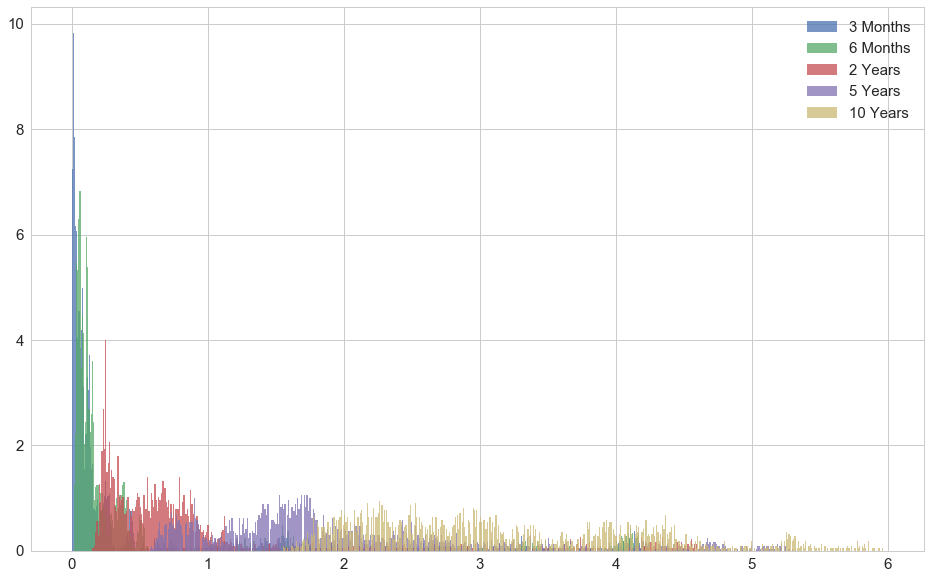

In [16]:
tenor_label_pairs = [('3-month','3 Months'), ('6-month','6 Months'), ('2-year','2 Years'), \
                     ('5-year','5 Years'), ('10-year', '10 Years')]

sns.set(font_scale=1.5)
sns.set_style("whitegrid")
plt.figure(figsize=(16,10))

for (tenor, label) in tenor_label_pairs:
    plt.hist(df[tenor]/df[tenor].std(), bins=500, alpha=0.75, label=label, normed=True)

plt.legend(loc='best')
plt.show()

The histogram of the various interest rates look similar to what you would expect from a log-normal distribution:

![Probability Density Function of a Log-normal Distribution](data/PDF-log_normal_distributions.png)

The rates seemed to be following log-normal distribution, we can assume that the daily rate returns to approximately follow normal distribution. This can be explained as follows:
  
For small values of $x$, $\log (1+x) \approx x $  
For a short period return, such as daily return, $\frac{y_t - y_{t-1}}{y_{t-1}}$ is very small.
$ \implies \log y_t - \log y_{t-1} = \log \frac {y_t} {y_{t-1}} \approx \frac {y_t} {y_{t-1}} - 1 = \frac{y_t - y_{t-1}}{y_{t-1}} $  
Hence, rate returns can be assumed to follow a normal distribution

***
## Question 3 ##

Given the following

\begin{align}
\require{cancel}
B = \sum_{n=1}^{N} \frac{C\Delta T} {(1 + Y \Delta T )^n}  + \frac{1} {(1 + Y \Delta T )^N}
\end{align}


Using summation of geometric progression (assuming $Y \cancel {=} 0$):
\begin{aligned}
B = \frac{C\Delta T} {(1 + Y \Delta T )}\bigg(\frac {1 - (\frac {1} {1 + Y \Delta T})^N} {1 - (\frac {1} {1 + Y \Delta T})}\bigg)  + \frac{1} {(1 + Y \Delta T )^N}
\end{aligned}

\begin{align}
= \frac{C\Delta T \cancel{(1 + Y \Delta T)} } {\cancel{(1 + Y \Delta T )}}\bigg(\frac {1 - (\frac {1} {1 + Y \Delta T})^N} {(1 + Y \Delta T) - 1}\bigg)  + \frac{1} {(1 + Y \Delta T )^N}
\end{align}

\begin{align}
= \frac{C\cancel{\Delta T} } {Y \cancel{\Delta T}}\bigg({1 - \frac {1} {(1 + Y \Delta T)^N}} \bigg)  + \frac{1} {(1 + Y \Delta T )^N}
\end{align}


\begin{align}
\\
\implies
\boxed{
B = 
 \frac{C} {Y}\bigg({1 - \frac {1} {(1 + Y \Delta T)^N}} \bigg)  + \frac{1} {(1 + Y \Delta T )^N} } \tag{1}
\end{align}



  
  
Now, we have to prove that a par bond ($B = 1$) has yield ($Y$) the same as coupon ($C$).  
That is,
\begin{align}
B = 1\ \ \text{iff}\ \ C = Y
\end{align}

We first prove the reverse implication.  
If $C = Y$  :

\begin{align}
B = 
 \frac{\cancel{C}} {\cancel{Y}}\bigg({1 - \frac {1} {(1 + Y \Delta T)^N}} \bigg)  + \frac{1} {(1 + Y \Delta T )^N} \\
 = \bigg({1 - \frac {1} {(1 + Y \Delta T)^N}} \bigg)  + \frac{1} {(1 + Y \Delta T )^N}  = 1
\end{align}

\begin{align}
\implies \boxed {B = 1}
\end{align}

Next, the forward implication.  
if $B = 1 $  :
\begin{align}
\implies
1 = \frac{C} {Y}\bigg({1 - \frac {1} {(1 + Y \Delta T)^N}} \bigg)  + \frac{1} {(1 + Y \Delta T )^N}
\end{align} 
Taking all terms in the LHS to the RHS
\begin{align}
\implies
\bigg( 1 - \frac{1} {(1 + Y \Delta T)^N}\bigg) - \frac {C} {Y} \bigg({1 - \frac {1} {(1 + Y \Delta T)^N}} \bigg) = 0
\\
\implies \bigg( 1 - \frac {C} {Y} \bigg) \bigg( 1 - \frac{1} {(1 + Y \Delta T)^N}\bigg) = 0 
\end{align}

So, either $ \bigg( 1 - \frac {C} {Y} \bigg) = 0$ or $ \bigg( 1 - \frac{1} {(1 + Y \Delta T)^N}\bigg) = 0 $
  
if $ \bigg( 1 - \frac {C} {Y} \bigg) = 0 \ \ \ \implies \boxed{Y = C} $

if $ \bigg( 1 - \frac{1} {(1 + Y \Delta T)^N}\bigg) = 0 \ \ \ \implies \frac{1} {(1 + Y \Delta T)^N} = 1 \\
\implies Y = 0 $

However, while deriving equation $(1)$, we assumed that $Y \cancel{=} 0$, so we have to take that case differently.
  
if $ Y = 0 $, 
\begin{align}
\implies 1 = \sum_{n=1}^{N} \frac{C\Delta T} {(1 + \cancelto{0}{Y \Delta T} )^n}
+ \frac{1} {(1 + \cancelto{0}{Y \Delta T} )^N}
\\
\implies 1 = C \Delta T \sum_{n=1}^{N} 1 + 1
\\
\implies C \Delta T \ N = 0 \\ \implies C = 0
\end{align}
Or
\begin{align}
\boxed{C = Y}
\end{align}

Now, from equation $(1)$ we have the following result:

\begin{align}
B = 
 \frac{C} {Y}\bigg({1 - \frac {1} {(1 + Y \Delta T)^N}} \bigg)  + \frac{1} {(1 + Y \Delta T )^N}
\end{align}

Taking partial derivative w.r.t $Y$ on both sides:
\\
\begin{align}
\frac {\partial B} {\partial Y} = \frac {\partial } {\partial Y}\bigg[ \bigg(\frac {C} {Y} \bigg) \bigg({1 - \frac {1} {(1 + Y \Delta T)^N}} \bigg) \bigg] + \frac {\partial } {\partial Y} \bigg( \frac{1} {(1 + Y \Delta T )^N} \bigg)
\\
\\
= \bigg( \frac {\partial } {\partial Y}\bigg(\frac {C} {Y} \bigg) \bigg) \bigg({1 - \frac {1} {(1 + Y \Delta T)^N}} \bigg) + \bigg( \frac {C} {Y}\bigg) \frac {\partial } {\partial Y} \bigg({1 - \frac {1} {(1 + Y \Delta T)^N}}\bigg) +  \frac {(-N \Delta T)} {(1 + Y \Delta T )^{N+1}}
\\
\\
= \frac{-C} {Y^2} \bigg({1 - \frac {1} {(1 + Y \Delta T)^N}} \bigg) + \bigg( \frac {C} {Y}\bigg)\bigg(\frac {N \Delta T} {(1 + Y \Delta T)^{N+1}} \bigg) -  \frac {N \Delta T} {(1 + Y \Delta T )^{N+1}}
\\
\\
\implies \boxed{ \frac {\partial B} {\partial Y} = \frac{-C} {Y^2} \bigg({1 - \frac {1} {(1 + Y \Delta T)^N}} \bigg) + \bigg( \frac {C} {Y} - 1 \bigg)\bigg(\frac {N \Delta T} {(1 + Y \Delta T)^{N+1}} \bigg)} \tag{2}
\end{align}

Now, from the initial relation regarding $B$, we have:
\begin{align}
B = \sum_{n=1}^{N} \frac{C\Delta T} {(1 + Y \Delta T )^n}  + \frac{1} {(1 + Y \Delta T )^N}
\end{align}

Taking natural log on both sides:
\begin{align}
\ln {B} = \ln \bigg( \sum_{n=1}^{N} \frac{C\Delta T} {(1 + Y \Delta T )^n}  + \frac{1} {(1 + Y \Delta T )^N} \bigg)
\end{align}

Taking partial derivative w.r.t. $Y$:
\begin{align}
\frac {1} {B} \frac{\partial B} {\partial Y} = \frac {\frac {\partial} {\partial Y} \bigg( \sum_{n=1}^{N} \frac{C\Delta T} {(1 + Y \Delta T )^n}  + \frac{1} {(1 + Y \Delta T )^N} \bigg)}
{\bigg( \sum_{n=1}^{N} \frac{C\Delta T} {(1 + Y \Delta T )^n}  + \frac{1} {(1 + Y \Delta T )^N} \bigg)}
\\
\\
= \frac {\sum_{n=1}^{N} \frac{C\Delta T (-n \Delta T)} {(1 + Y \Delta T )^{n+1}}  + \frac{(-N \Delta T)} {(1 + Y \Delta T )^{N+1}}}
{\bigg( \sum_{n=1}^{N} \frac{C\Delta T} {(1 + Y \Delta T )^n}  + \frac{1} {(1 + Y \Delta T )^N} \bigg)}
\\
\\
= \frac {-1} {(1 + Y \Delta T)}\Bigg[ \frac {\sum_{n=1}^{N} \frac{C\Delta T } {(1 + Y \Delta T )^{n+1}}(n \Delta T)  + \frac{1} {(1 + Y \Delta T )^{N+1}} (N \Delta T)}
{\sum_{n=1}^{N} \frac{C\Delta T} {(1 + Y \Delta T )^n}  + \frac{1} {(1 + Y \Delta T )^N}} \Bigg]
\\
\\
\implies \boxed{
\frac {1} {B} \frac{\partial B} {\partial Y} = \frac {-1} {(1 + Y \Delta T)}\Bigg[ \frac {\sum_{n=1}^{N} \frac{C\Delta T } {(1 + Y \Delta T )^{n+1}}(n \Delta T)  + \frac{1} {(1 + Y \Delta T )^{N+1}} (N \Delta T)}
{\sum_{n=1}^{N} \frac{C\Delta T} {(1 + Y \Delta T )^n}  + \frac{1} {(1 + Y \Delta T )^N}} \Bigg]} \tag{3}
\end{align}

Now, from equation $(1)$ we have the following relation:

\begin{align}
B = \frac{C} {Y}\bigg({1 - \frac {1} {(1 + Y \Delta T)^N}} \bigg)  + \frac{1} {(1 + Y \Delta T )^N}
\\
\\
= \frac{C [(1 + Y \Delta T)^N  - 1]} {Y (1 + Y \Delta T)^N} + \frac{1} {(1 + Y \Delta T )^N}
\\
\\
= \frac{C [(1 + Y \Delta T)^N  - 1] + Y} {Y (1 + Y \Delta T)^N}
\end{align}

Taking natural log on both sides:
\begin{align}
\ln B = \ln \ [C (1 + Y \Delta T)^N + (Y - C)] - \ln Y - N \ln \ (1 + Y \Delta T)
\end{align}

Partial derivative w.r.t. $Y$:
\begin{align}
\frac {1} {B} \frac{\partial B} {\partial Y} = \frac { \frac {\partial} {\partial Y} [C (1 + Y \Delta T)^N + (Y - C)]}  {C (1 + Y \Delta T)^N + (Y - C)} - \frac {1} {Y} - \frac {N \Delta T} {(1 + Y \Delta T)}
\\
\\
= \frac { [C \ N \ \Delta T(1 + Y \Delta T)^{N-1} + 1]}  {C (1 + Y \Delta T)^N + (Y - C)} - \bigg( \frac {1} {Y} + \frac {N \Delta T} {(1 + Y \Delta T)} \bigg)
\\
\\
= \frac { [N \ \Delta T(1 + Y \Delta T)^{N-1} + \frac{1}{C}]}  {(1 + Y \Delta T)^N + (\frac{Y}{C} - 1)} - \bigg( \frac {1} {Y} + \frac {N \Delta T} {(1 + Y \Delta T)} \bigg)
\\
\\
\implies \frac {\partial B} {B}
= \frac {\partial Y} {Y} \ Y \bigg[\frac { N \ \Delta T(1 + Y \Delta T)^{N-1} + \frac{1}{C}}  {(1 + Y \Delta T)^N + (\frac{Y}{C} - 1)} - \bigg( \frac {1} {Y} + \frac {N \Delta T} {(1 + Y \Delta T)} \bigg) \bigg]
\end{align}
  
This gives us the following relation:
\begin{align}
\implies \boxed {\frac {\partial B} {B}
= \frac {\partial Y} {Y} \ \bigg[\frac { N \ Y \Delta T(1 + Y \Delta T)^{N-1} + \frac{Y}{C}}  {(1 + Y \Delta T)^N + (\frac{Y}{C} - 1)} - \bigg( 1 + \frac {N \ Y \Delta T} {(1 + Y \Delta T)} \bigg) \bigg]} \tag{4}
\end{align}
  
or:
  
\begin{align}
\implies \boxed {\frac {\Delta B} {B}
= \frac {\Delta Y} {Y} \ \bigg[\frac { N \ Y \Delta T(1 + Y \Delta T)^{N-1} + \frac{Y}{C}}  {(1 + Y \Delta T)^N + (\frac{Y}{C} - 1)} - \bigg( 1 + \frac {N \ Y \Delta T} {(1 + Y \Delta T)} \bigg) \bigg]} \tag{5}
\end{align}

This gives us the following relation between price-volatility ($\sigma_B$) and yield-volatility ($\sigma_Y$) for general bonds:
\begin{align}
\\
\implies \boxed {\sigma_B
= \sigma_Y \ \left| \frac { N \ Y \Delta T(1 + Y \Delta T)^{N-1} + \frac{Y}{C}}  {(1 + Y \Delta T)^N + (\frac{Y}{C} - 1)} - \bigg( 1 + \frac {N \ Y \Delta T} {(1 + Y \Delta T)} \bigg) \right|} \tag{6}
\end{align}

[absolute value since the standard deviation is always positive]

For par bonds ($B=1$), we found that $Y=C$, so we get the following relation:
\begin{align}
\sigma_B
= \sigma_Y \ \left|\frac { N \ Y \Delta T(1 + Y \Delta T)^{N-1} + \cancelto{1}{\frac{Y}{C}}}  {(1 + Y \Delta T)^N + (\cancelto{0}{\frac{Y}{C} - 1)}} - \bigg( 1 + \frac {N \ Y \Delta T} {(1 + Y \Delta T)} \bigg) \right|
\\
\\
= \sigma_Y \ \left|\frac { N \ Y \Delta T(1 + Y \Delta T)^{N-1} + 1}  {(1 + Y \Delta T)^N } - \bigg( 1 + \frac {N \ Y \Delta T} {(1 + Y \Delta T)} \bigg) \right|
\\
\\
= \sigma_Y \ \left|\frac { N \ Y \Delta T} {(1 + Y \Delta T)} + \frac {1}  {(1 + Y \Delta T)^N } - \bigg( 1 + \frac {N \ Y \Delta T} {(1 + Y \Delta T)} \bigg) \right|
\\
\\
= \sigma_Y \ \left|\frac {1}  {(1 + Y \Delta T)^N } - 1  \right|
\end{align}

Assuming $Y > 0 $ for par bonds, we get:

\begin{align}
\\
\implies \boxed {\sigma_B
= \sigma_Y \ \bigg(1 - \frac {1}  {(1 + Y \Delta T)^N } \bigg)} \tag{7}
\end{align}



***
## Question 4 ##

We have the following portfolio of bonds given to us:

3-month: - 10 MM  
6-month: - 50 MM  
2-year: 50 MM  
5-year: - 20 MM  
10-year: 50 MM  
  
(Negative value signifies we are shorting the bond)

From equation $(7)$ we have the following relation between price-volatility ($\sigma_B$) and yield-volatility $(\sigma_Y)$ :
\begin{align}
\\
\sigma_B
= \sigma_Y \ \bigg(1 - \frac {1}  {(1 + Y \Delta T)^N } \bigg)
\end{align}

Let $ K_i =  \bigg(1 - \frac {1}  {(1 + Y_i\Delta T)^N } \bigg) $, where $Y_i$ is the mean yield of bond $i$.  
  
We need to find $K_i$ for all bonds so that we have the standard deviation for each bond. Let $K$ be the vector formed by these $K_i$s

In [17]:
mean_yields = df.mean()
mean_yields

1-month    0.537959
3-month    0.576921
6-month    0.678942
1-year     0.778255
2-year     1.027540
3-year     1.302732
5-year     1.872851
7-year     2.337232
10-year    2.773858
20-year    3.406597
30-year    3.611214
dtype: float64

In [18]:
K = []
N = [ float(float(1)/12), 0.25, 0.5, 1, 2, 3, 5, 7, 10, 20, 30]
for i, y in enumerate(mean_yields):
    K.append(1 - (1 + (y*2))**(-N[i]))
K

[0.05905160053181846,
 0.17453902323190351,
 0.34876334224583938,
 0.60884167773178111,
 0.89285920561071919,
 0.97866381456573759,
 0.99958457055017336,
 0.99999472131647238,
 0.99999999309598242,
 1.0,
 1.0]

To find the covariance matrix of bond returns, we need the Hadamard product of covariance matrix of yield returns $\textbf{$\Sigma_Y$}$ and $\textbf{$K.K^T$}$, that is,  
  
\begin{align}
\Sigma_B = \Sigma_Y \odot K.K^T
\end{align}
  
This is because we are multipying each $\sigma_i$ with $K_i$

In [19]:
cov_matrix_yields = df_change.cov()
K_K_t = np.outer(K, K)
cov_matrix_bonds = np.multiply(cov_matrix_yields, K_K_t)
cov_matrix_bonds

,1-month,3-month,6-month,1-year,2-year,3-year,5-year,7-year,10-year,20-year,30-year
1-month,0.000742,0.000468,0.000149,0.000164,0.000083,0.000079,0.000047,0.000032,0.000027,0.000024,0.000021
3-month,0.000468,0.003773,0.000715,0.000427,0.000327,0.000270,0.000186,0.000128,0.000095,0.000062,0.000056
6-month,0.000149,0.000715,0.001223,0.000401,0.000379,0.000309,0.000230,0.000167,0.000130,0.000094,0.000086
1-year,0.000164,0.000427,0.000401,0.001209,0.000835,0.000751,0.000545,0.000412,0.000303,0.000210,0.000186
2-year,0.000083,0.000327,0.000379,0.000835,0.002270,0.001810,0.001363,0.001027,0.000746,0.000513,0.000442
3-year,0.000079,0.000270,0.000309,0.000751,0.001810,0.002017,0.001490,0.001146,0.000843,0.000589,0.000511
5-year,0.000047,0.000186,0.000230,0.000545,0.001363,0.001490,0.001291,0.001019,0.000767,0.000552,0.000484
7-year,0.000032,0.000128,0.000167,0.000412,0.001027,0.001146,0.001019,0.000857,0.000652,0.000482,0.000426
10-year,0.000027,0.000095,0.000130,0.000303,0.000746,0.000843,0.000767,0.000652,0.000530,0.000400,0.000358
20-year,0.000024,0.000062,0.000094,0.000210,0.000513,0.000589,0.000552,0.000482,0.000400,0.000328,0.000295


Similar formula can be used to find the correlation matrix of the bond returns:

In [20]:
corr_matrix_yields = df_change.corr()
corr_matrix_bonds = np.multiply(corr_matrix_yields, K_K_t)
corr_matrix_bonds

,1-month,3-month,6-month,1-year,2-year,3-year,5-year,7-year,10-year,20-year,30-year
1-month,0.003487,0.002881,0.003221,0.006235,0.003376,0.003719,0.002839,0.002390,0.002544,0.002894,0.002797
3-month,0.002881,0.030464,0.020266,0.021236,0.017392,0.016730,0.014735,0.012379,0.011677,0.009737,0.009644
6-month,0.003221,0.020266,0.121636,0.070032,0.070888,0.067155,0.063878,0.057027,0.056480,0.051721,0.051519
1-year,0.006235,0.021236,0.070032,0.370688,0.274054,0.286458,0.265313,0.246336,0.230218,0.203527,0.196659
2-year,0.003376,0.017392,0.070888,0.274054,0.797198,0.739195,0.710637,0.657634,0.607530,0.530650,0.499009
3-year,0.003719,0.016730,0.067155,0.286458,0.739195,0.957783,0.902935,0.852819,0.798334,0.709357,0.670105
5-year,0.002839,0.014735,0.063878,0.265313,0.710637,0.902935,0.999169,0.967841,0.926628,0.848407,0.810653
7-year,0.002390,0.012379,0.057027,0.246336,0.657634,0.852819,0.967841,0.999989,0.967679,0.908329,0.876769
10-year,0.002544,0.011677,0.056480,0.230218,0.607530,0.798334,0.926628,0.967679,1.000000,0.958993,0.936166
20-year,0.002894,0.009737,0.051721,0.203527,0.530650,0.709357,0.848407,0.908329,0.958993,1.000000,0.980326


Now that we have the covariance matrix, we can find the covariance of a linear combination of the bond returns.
Since we assumed that bond returns follow a normal distribution, their linear combination will also follow a normal distribution with standard deviation given by:

\begin{align}
\sigma = \sqrt{\textbf{$w^\intercal$ $\Sigma$ $w$}}
\end{align}
where $\textbf{$w$}$ $\Rightarrow$ weights vector and $\Sigma$ $\Rightarrow$ Covariance Matrix


In [24]:
weights = np.array([0, -100, -50, 0, 50, 0, -20, 0, 50, 0, 0])
risk_weights = weights/float(np.abs(weights).sum())
portfolio_sigma = math.sqrt(np.dot(np.dot(risk_weights.T, cov_matrix_bonds), risk_weights))
portfolio_sigma

0.02602420808820877

Now that we have the portfolio standard deviation, assuming normal distribution, we can find the 99% VaR as being around $ 2.33 \ \sigma $

In [25]:
VaR99 = 2.33 * portfolio_sigma 
VaR99

0.06063640484552644

The total risk premium will be:

In [26]:
risk_premium = VaR99 * float(np.abs(weights).sum())
risk_premium

16.37182930829214

That is, the risk premium is around **16.37 MM**
  
Now, let us calculate the risk premium using the method described in Question 1. First, we get the correlation matrix provided:

In [27]:
corr_matrix_example = pd.read_csv('data/CorrelationMatrix.csv', index_col=0)
corr_matrix_example = corr_matrix_example.astype(float)
corr_matrix_example

,TSY0-3Mon,TSY3-6Mon,TSY6-9Mon,TSY9-12Mon,TSY1-3Yr,TSY3-5Yr,TSY5-7Yr,TSY7-10Yr,TSY10-15Yr,TSY15+Yr
TSY0-3Mon,1.00,0.88,0.77,0.66,0.33,0.21,0.16,0.12,0.10,0.07
TSY3-6Mon,0.88,1.00,0.94,0.85,0.50,0.35,0.28,0.22,0.18,0.14
TSY6-9Mon,0.77,0.94,1.00,0.95,0.63,0.46,0.38,0.30,0.26,0.21
TSY9-12Mon,0.66,0.85,0.95,1.00,0.76,0.59,0.49,0.41,0.36,0.28
TSY1-3Yr,0.33,0.50,0.63,0.76,1.00,0.92,0.83,0.73,0.66,0.54
TSY3-5Yr,0.21,0.35,0.46,0.59,0.92,1.00,0.97,0.91,0.84,0.73
TSY5-7Yr,0.16,0.28,0.38,0.49,0.83,0.97,1.00,0.97,0.93,0.83
TSY7-10Yr,0.12,0.22,0.30,0.41,0.73,0.91,0.97,1.00,0.98,0.91
TSY10-15Yr,0.10,0.18,0.26,0.36,0.66,0.84,0.93,0.98,1.00,0.96
TSY15+Yr,0.07,0.14,0.21,0.28,0.54,0.73,0.83,0.91,0.96,1.00


Next, we use the 'haircuts' to get a proxy covariance matrix:

In [28]:
H = [0.0008, 0.0013, 0.0018, 0.0023, 0.0046, 0.0109, 0.0149, 0.0213, 0.0254, 0.041]
H_H_t = np.outer(H, H)
cov_matrix_example = np.multiply(corr_matrix_example.as_matrix(), H_H_t)
cov_matrix_example

array([[  6.40000000e-07,   9.15200000e-07,   1.10880000e-06,
          1.21440000e-06,   1.21440000e-06,   1.83120000e-06,
          1.90720000e-06,   2.04480000e-06,   2.03200000e-06,
          2.29600000e-06],
       [  9.15200000e-07,   1.69000000e-06,   2.19960000e-06,
          2.54150000e-06,   2.99000000e-06,   4.95950000e-06,
          5.42360000e-06,   6.09180000e-06,   5.94360000e-06,
          7.46200000e-06],
       [  1.10880000e-06,   2.19960000e-06,   3.24000000e-06,
          3.93300000e-06,   5.21640000e-06,   9.02520000e-06,
          1.01916000e-05,   1.15020000e-05,   1.18872000e-05,
          1.54980000e-05],
       [  1.21440000e-06,   2.54150000e-06,   3.93300000e-06,
          5.29000000e-06,   8.04080000e-06,   1.47913000e-05,
          1.67923000e-05,   2.00859000e-05,   2.10312000e-05,
          2.64040000e-05],
       [  1.21440000e-06,   2.99000000e-06,   5.21640000e-06,
          8.04080000e-06,   2.11600000e-05,   4.61288000e-05,
          5.68882000e-05

Finally, we apply the formula from Question 1 to find the risk premium:

\begin{align}
R
= \sqrt{\sum_{i=1}^{10}\sum_{j=1}^{10}\rho_{ij}h_i h_j N_i N_j}
\end{align}

In [30]:
net_value_buckets = np.array([-100, -50, 0, 50, 0, -20, 0, 50, 0])
risk_premium_example = math.sqrt(np.dot(np.dot(net_value_buckets.T, cov_matrix_example), net_value_buckets))
risk_premium_example

1.0180809398078328

That is, around **1.01 MM**

## Conclusion##

Using the correlation matrix from CMT data, the risk premium we calculated was **16.37 MM**, while using the haircuts and the given correlation matrix, the risk premium calculated was **1.01 MM**

As the figures suggest, there seem to be a huge gap in the risk premiums calculated using the two different approach. The following is one possible explanation as to why this might be happening:

We compare the correlation matrix in **Question 1** and correlation matrix of **CMT data**.

Let's look at the **correlation matrix of yield rates** of CMT data;

In [32]:
corr_matrix

,1-month,3-month,6-month,1-year,2-year,3-year,5-year,7-year,10-year,20-year,30-year
1-month,1.000000,0.996157,0.988650,0.980268,0.957150,0.922289,0.841645,0.762961,0.696912,0.574766,0.546457
3-month,0.996157,1.000000,0.996193,0.989637,0.968581,0.934291,0.853933,0.774537,0.707737,0.584191,0.553151
6-month,0.988650,0.996193,1.000000,0.997418,0.979444,0.946374,0.866561,0.785603,0.717580,0.592526,0.555005
1-year,0.980268,0.989637,0.997418,1.000000,0.988929,0.960377,0.883735,0.803226,0.732418,0.605738,0.563677
2-year,0.957150,0.968581,0.979444,0.988929,1.000000,0.989651,0.933236,0.862196,0.787439,0.658582,0.613263
3-year,0.922289,0.934291,0.946374,0.960377,0.989651,1.000000,0.971372,0.916118,0.843886,0.718547,0.671766
5-year,0.841645,0.853933,0.866561,0.883735,0.933236,0.971372,1.000000,0.983375,0.936492,0.836475,0.797046
7-year,0.762961,0.774537,0.785603,0.803226,0.862196,0.916118,0.983375,1.000000,0.980128,0.910874,0.881436
10-year,0.696912,0.707737,0.717580,0.732418,0.787439,0.843886,0.936492,0.980128,1.000000,0.972240,0.952036
20-year,0.574766,0.584191,0.592526,0.605738,0.658582,0.718547,0.836475,0.910874,0.972240,1.000000,0.987019


Now let's look at the **correlation matrix of yield rate returns** of CMT data; 

In [33]:
corr_matrix_returns

,1-month,3-month,6-month,1-year,2-year,3-year,5-year,7-year,10-year,20-year,30-year
1-month,1.000000,0.279559,0.156380,0.173430,0.064029,0.064352,0.048096,0.040466,0.043077,0.049016,0.047357
3-month,0.279559,1.000000,0.332921,0.199837,0.111603,0.097945,0.084455,0.070922,0.066900,0.055787,0.055254
6-month,0.156380,0.332921,1.000000,0.329809,0.227646,0.196749,0.183232,0.163512,0.161944,0.148297,0.147718
1-year,0.173430,0.199837,0.329809,1.000000,0.504137,0.480754,0.435947,0.404599,0.378125,0.334286,0.323005
2-year,0.064029,0.111603,0.227646,0.504137,1.000000,0.845946,0.796243,0.736552,0.680432,0.594327,0.558889
3-year,0.064352,0.097945,0.196749,0.480754,0.845946,1.000000,0.923004,0.871416,0.815739,0.724822,0.684714
5-year,0.048096,0.084455,0.183232,0.435947,0.796243,0.923004,1.000000,0.968248,0.927013,0.848760,0.810990
7-year,0.040466,0.070922,0.163512,0.404599,0.736552,0.871416,0.968248,1.000000,0.967684,0.908334,0.876774
10-year,0.043077,0.066900,0.161944,0.378125,0.680432,0.815739,0.927013,0.967684,1.000000,0.958993,0.936166
20-year,0.049016,0.055787,0.148297,0.334286,0.594327,0.724822,0.848760,0.908334,0.958993,1.000000,0.980326


We can see that while interest rates are highly correlated, interest rate returns are not that correlated.

When we look at the **correlation matrix for Question 1, 'Real-life' risk management system** as below,

In [34]:
corr_matrix_example

,TSY0-3Mon,TSY3-6Mon,TSY6-9Mon,TSY9-12Mon,TSY1-3Yr,TSY3-5Yr,TSY5-7Yr,TSY7-10Yr,TSY10-15Yr,TSY15+Yr
TSY0-3Mon,1.00,0.88,0.77,0.66,0.33,0.21,0.16,0.12,0.10,0.07
TSY3-6Mon,0.88,1.00,0.94,0.85,0.50,0.35,0.28,0.22,0.18,0.14
TSY6-9Mon,0.77,0.94,1.00,0.95,0.63,0.46,0.38,0.30,0.26,0.21
TSY9-12Mon,0.66,0.85,0.95,1.00,0.76,0.59,0.49,0.41,0.36,0.28
TSY1-3Yr,0.33,0.50,0.63,0.76,1.00,0.92,0.83,0.73,0.66,0.54
TSY3-5Yr,0.21,0.35,0.46,0.59,0.92,1.00,0.97,0.91,0.84,0.73
TSY5-7Yr,0.16,0.28,0.38,0.49,0.83,0.97,1.00,0.97,0.93,0.83
TSY7-10Yr,0.12,0.22,0.30,0.41,0.73,0.91,0.97,1.00,0.98,0.91
TSY10-15Yr,0.10,0.18,0.26,0.36,0.66,0.84,0.93,0.98,1.00,0.96
TSY15+Yr,0.07,0.14,0.21,0.28,0.54,0.73,0.83,0.91,0.96,1.00


The correlations here seem much higher compared to the correlation matrix for interest rate returns (or bond price returns), and seem to be more in line with correlation matrix of interest rates (or bond prices) instead

It is possible that the method in Question 1 uses **bond-price correlations**. In comparison, our method uses **bond-returns correlation**.

Now, the question is how does that make the risk premium calculated using the haircuts so less compared to our value?  
The reason is that since correlations are higher, it is easier to create a hedged portfolio - if two bonds are highly correlated, we can easily reduce risk by buying one and shorting the other. However, as we found in Question 2, the returns of bonds are not that correlated, so even with hedging the risk is not lowered by that much amount.

We conclude that the risk premium calculated by CMT data is higher than the one calculated by using haircuts, since the correlation in Question 1 is much higher than our calculated CMT correlation.